## Problem set: Jupyter, pyplot and numpy
These problems relate to Jupyter, numpy, and pyplot. We will use the famous iris data set. 

### 1. Get and load the data

In [221]:
import csv
import numpy as np

filename = 'data.csv'
SepalLength, SepalWidth, PetalLength, PetalWidth = np.genfromtxt('data.csv', delimiter=',', usecols=(0,1,2,3), unpack=True, dtype=float)
species = np.genfromtxt('data.csv', delimiter=',', usecols=(4), unpack=True, dtype=str) 
   

### 2. Write a note about the data set.  
The [Iris flower data set or Fisher's Iris data](https://en.wikipedia.org/wiki/Iris_flower_data_set) set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".  

### 3. Create a simple plot.


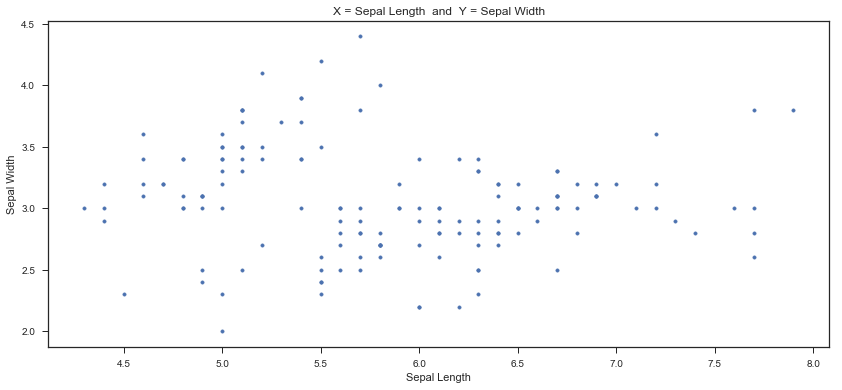

In [222]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (14.0, 6.0) 
plt.scatter(SepalLength, SepalWidth, marker='.')

plt.title('X = Sepal Length  and  Y = Sepal Width')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

### 4. Create a more complex plot.
Re-create the above plot, but this time plot the setosa data points in red, the versicolor data point in green, and the virginica data points in blue. Setosa, versicolor, and virginica are the three possible values of the species variable. Add a legend to the plot showing which species is in which colour.

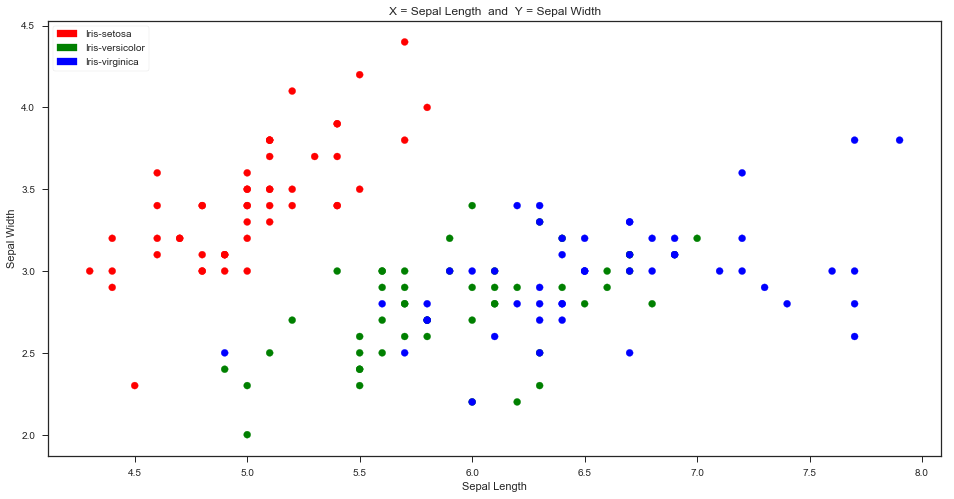

In [223]:
import matplotlib.patches as mpatches

plt.rcParams['figure.figsize'] = (16.0, 8.0)
colours = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}
plt.scatter(SepalLength, SepalWidth, c=[colours[i] for i in species], label=[colours[i] for i in colours])

plt.title('X = Sepal Length  and  Y = Sepal Width')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

handles = [mpatches.Patch(color=colour, label=label) for label, colour in [('Iris-setosa', 'red'), ('Iris-versicolor', 'green'), ('Iris-virginica', 'blue')]]

plt.legend(handles=handles, loc=2, frameon=True)

plt.show()

### 5. Use seaborn

Use the seaborn library to create a scatterplot matrix of all five variables.

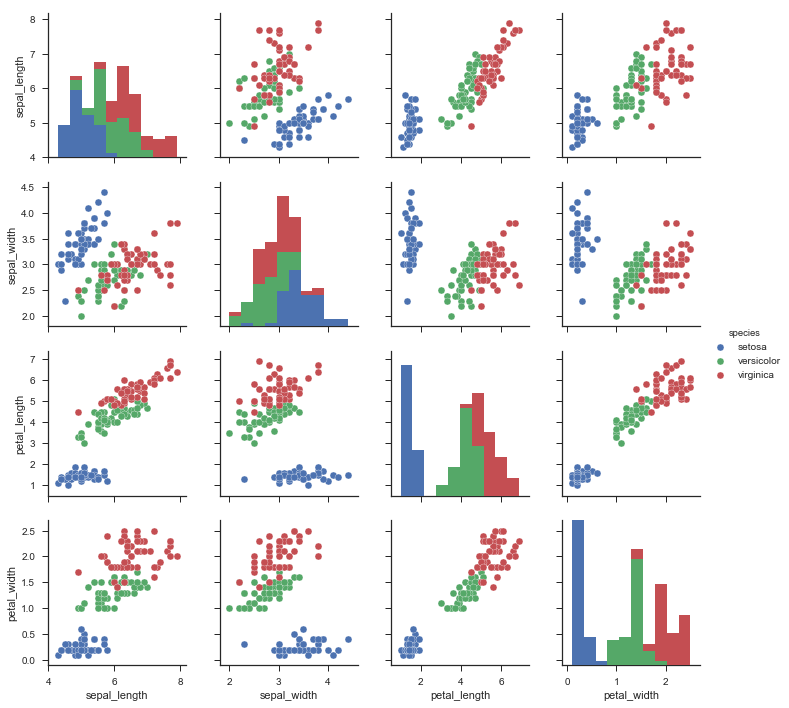

In [224]:
import seaborn as seab

data = seab.load_dataset("iris")
seab.pairplot(data, hue="species")

plt.show()


### 6. Fit a line

Fit a straight line to the variables petal length and petal width for the whole data set. Plot the data points in a scatter plot with the best fit line shown.

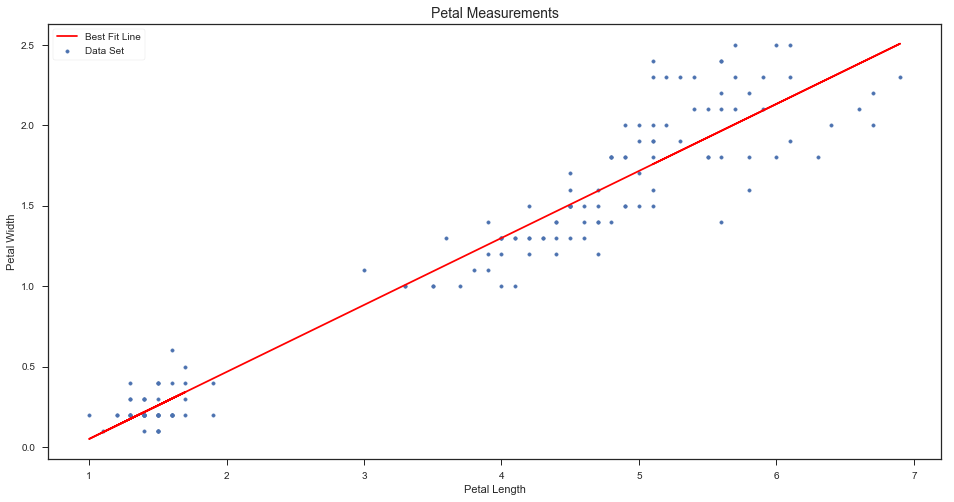

In [225]:
w = PetalLength
d = PetalWidth

w_avg = np.mean(w)
d_avg = np.mean(d)

w_zero = w - w_avg
d_zero = d - d_avg

m = np.sum(w_zero * d_zero) / np.sum(w_zero * w_zero)
c = d_avg - m * w_avg

plt.title('Petal Measurements', fontsize=14)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.scatter(w, d, marker='.', label='Data Set')
plt.plot(w, m * w + c, 'r', label='Best Fit Line')

plt.legend(loc=2, frameon=True)
plt.show()

### 7. Calculate the R-squared value

Calculate the R-squared value for your line above.

In [226]:
#https://github.com/emerging-technologies/emerging-technologies.github.io/blob/master/notebooks/simple-linear-regression.ipynb

print("The R-squared value is %6.4f"  % np.corrcoef(w, d)[0][1]**2)


The R-squared value is 0.9269


### 8. Fit another line

Use numpy to select only the data points where species is setosa. Fit a straight line to the variables petal length and petal width. Plot the data points in a scatter plot with the best fit line shown.

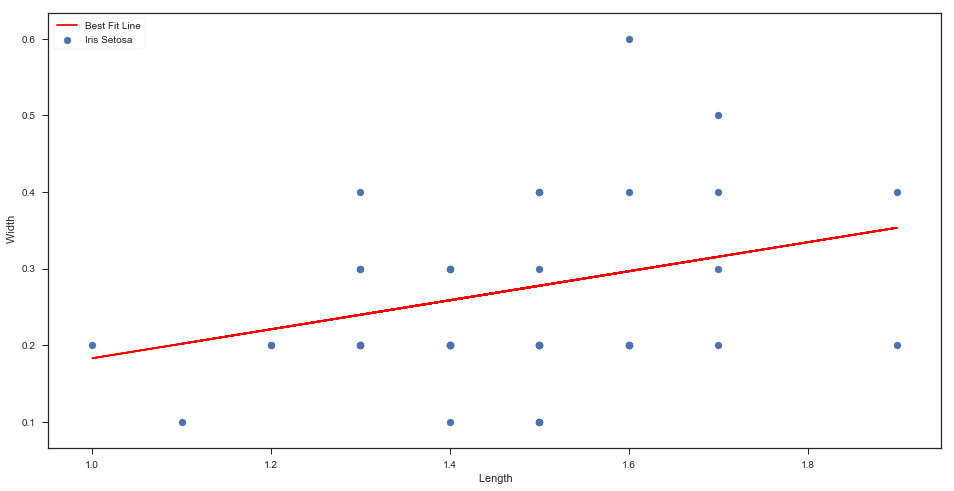

In [227]:
data = np.column_stack((SepalLength, SepalWidth, PetalLength, PetalWidth, species))

Len, Wid= [], []
for index, row in enumerate(data):
    Len.append(float(row[2]))
    Wid.append(float(row[3]))
    
    if index == 49:
        break

m, c = np.polyfit(Len, Wid, 1)
y = m * (Len + c)

plt.xlabel(' Length')
plt.ylabel(' Width')

plt.scatter(Len, Wid, label = 'Iris Setosa') 
plt.plot(Len, y, 'r', label = 'Best Fit Line') 

plt.legend(loc=2, frameon=True)
plt.show()

orM = m
orC = c

### 9. Calculate the R-squared value

Calculate the R-squared value for your line above.

In [228]:
#https://github.com/emerging-technologies/emerging-technologies.github.io/blob/master/notebooks/simple-linear-regression.ipynb

print("The R-squared value is %6.4f"  % (1.0 - (np.sum((d - m * w - c)**2)/np.sum((d - d_avg)**2))))


The R-squared value is 0.1830


### 10. Use gradient descent

Use gradient descent to approximate the best fit line for the petal length and petal width setosa values. Compare the outputs to your calculations above.

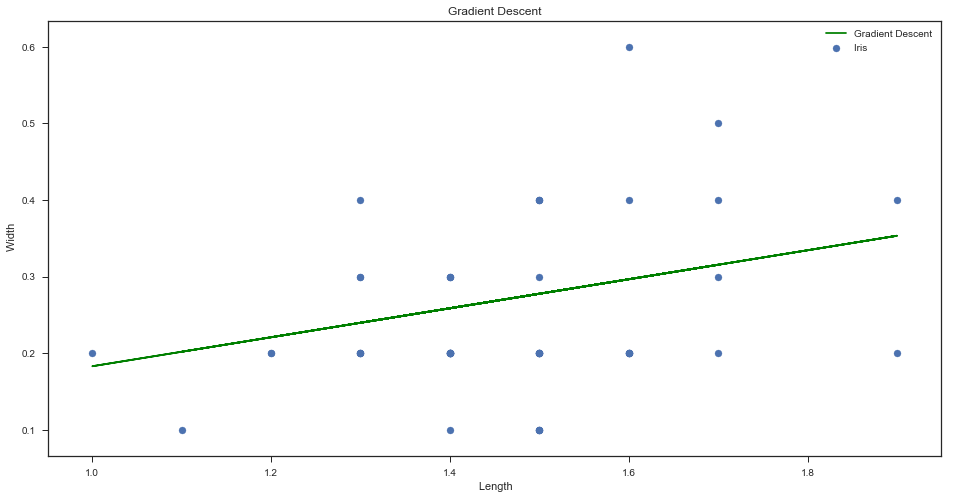

In [229]:
# https://github.com/emerging-technologies/emerging-technologies.github.io/blob/master/notebooks/gradient-descent.ipynb

w = np.array(Len)
d = np.array(Wid)

def gradient_descent_m(x, y, m, c):
  return -2.0 * np.sum(x * (y - m * x - c))

def gradient_descent_c(x, y, m, c):
  return -2.0 * np.sum(y - m * x - c)

eta = 0.0001 
gdm, gdc = 1.0, 1.0 
change = True

while change:
  mnew = gdm - eta * gradient_descent_m(w, d, gdm, gdc)
  cnew = gdc - eta * gradient_descent_c(w, d, gdm, gdc)
    
  if gdm == mnew and gdc == cnew:
    change = False
  else:
    gdm, gdc = mnew, cnew


plt.title('Gradient Descent')
plt.xlabel(' Length')
plt.ylabel(' Width')

y = gdm * (Len + gdc)
plt.scatter(Len, Wid, label = 'Iris ')
plt.plot(Len, y, 'g', label='Gradient Descent')
plt.legend()
plt.show()




In [230]:
print("BEST LINE:  m: %20.16f  c: %20.16f" % (m, c))
print()
print("GRADIENT DESCENT:  m: %20.16f  c: %20.16f" % (gdm, gdc))

BEST LINE:  m:   0.1892624728850327  c:  -0.0330802603036878

GRADIENT DESCENT:  m:   0.1892624728849683  c:  -0.0330802603035933
